In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Load dataset
df = pd.read_csv('survey.csv')

#Remove unnecessary columns
df.drop(columns=['index', 'Timestamp', 'Country', 'state', 'comments'], inplace=True)

# Clean gender column
def clean_gender(g):
    g = g.lower()
    if g in ['male', 'm', 'man']:
        return 'male'
    elif g in ['female', 'f', 'woman']:
        return 'female'
    else:
        return 'other'

df['Gender'] = df['Gender'].apply(clean_gender)

# Drop rows with missing values in important columns
important_cols = [
    'Age', 'Gender', 'self_employed', 'work_interfere', 'no_employees',
    'remote_work', 'tech_company', 'benefits', 'care_options',
    'wellness_program', 'seek_help', 'mental_health_consequence',
    'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview',
    'mental_vs_physical', 'obs_consequence', 'treatment'
]
df.dropna(subset=important_cols, inplace=True)

#Drop Rows with invalid age values
for val in df['Age']:
    if val < 0 :
        df.drop(df[df['Age'] == val].index, inplace=True)

# Replace employee count ranges with estimates
df['no_employees'] = df['no_employees'].replace({
    '1-5': 3,
    '6-25': 15,
    '26-100': 63,
    '100-500': 300,
    '500-1000': 750,
    'More than 1000': 1200
})

df.shape


(975, 23)

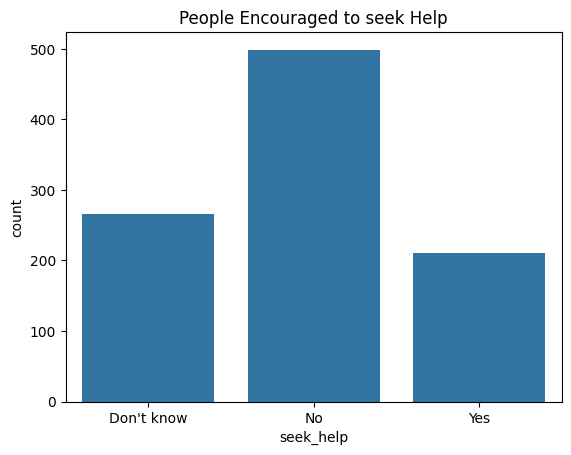

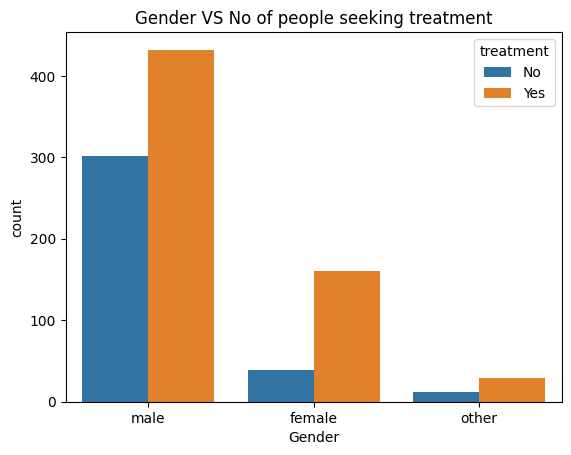

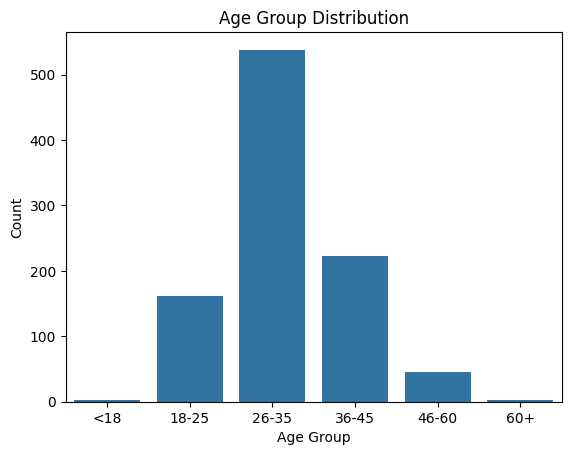

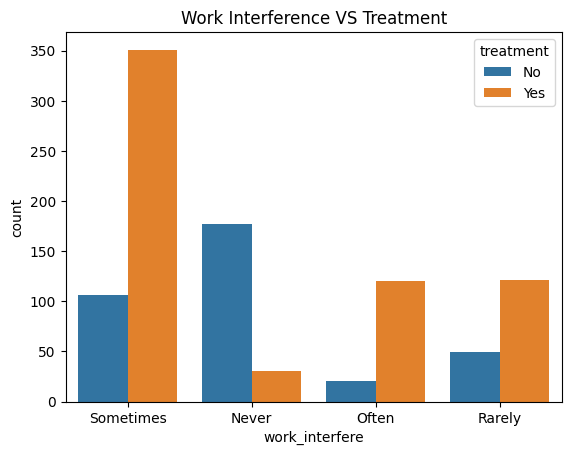

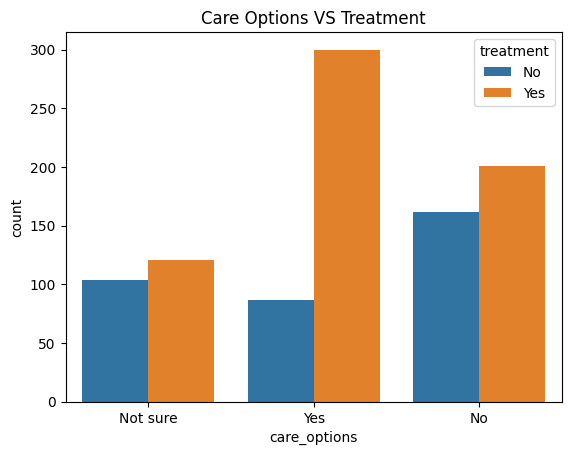

In [ ]:
#EDA 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Univariaate Analysis of people seeking help
sns.countplot(data=df, x='seek_help')
plt.title('People Encouraged to seek Help')
plt.show()

#Bivariate Analysis of Gender and treatment
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title("Gender VS No of people seeking treatment")
plt.show()

#Analysis of different Age Groups 
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Group Distribution")
plt.show()

#Analysis of Work Interference
sns.countplot(x='work_interfere', hue='treatment', data=df)
plt.title("Work Interference VS Treatment")             
plt.show()

#Analysis of Care Options Available
sns.countplot(x='care_options', hue='treatment', data=df)
plt.title("Care Options VS Treatment")
plt.show()


In [59]:
# Encode categorical features
encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

# Save encoders
joblib.dump(encoders, 'encoders.pkl')

['encoders.pkl']

In [ ]:
#Logistic Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Decide and remove the Dependent variable (treatment)
y = df['treatment'] 
X = df.drop('treatment', axis=1)  

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter = 1000)

# Train the model on the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report for precision, recall, F1-score
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7846153846153846
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        62
           1       0.81      0.89      0.85       133

    accuracy                           0.78       195
   macro avg       0.76      0.73      0.74       195
weighted avg       0.78      0.78      0.78       195

[[ 35  27]
 [ 15 118]]


In [ ]:
#Random Forest Classifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib 

# Decide and remove the Dependent variable / Target Column  (treatment)
y = df['treatment']  
X = df.drop('treatment', axis=1)  
# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

joblib.dump(model, 'mental_health_model.pkl')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report for precision, recall, F1-score
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8153846153846154
              precision    recall  f1-score   support

           0       0.76      0.61      0.68        62
           1       0.83      0.91      0.87       133

    accuracy                           0.82       195
   macro avg       0.80      0.76      0.77       195
weighted avg       0.81      0.82      0.81       195

[[ 38  24]
 [ 12 121]]


                      Feature  Importance
4              work_interfere    0.231580
0                         Age    0.110962
3              family_history    0.061083
5                no_employees    0.058456
13                      leave    0.049020
9                care_options    0.045652
8                    benefits    0.038949
16                  coworkers    0.037448
19      phys_health_interview    0.037223
14  mental_health_consequence    0.034983
17                 supervisor    0.034930
20         mental_vs_physical    0.031658
11                  seek_help    0.029172
10           wellness_program    0.028733
1                      Gender    0.028641
12                  anonymity    0.026414
15    phys_health_consequence    0.023918
6                 remote_work    0.022415
18    mental_health_interview    0.018278
7                tech_company    0.017235
21            obs_consequence    0.017197
2               self_employed    0.016055


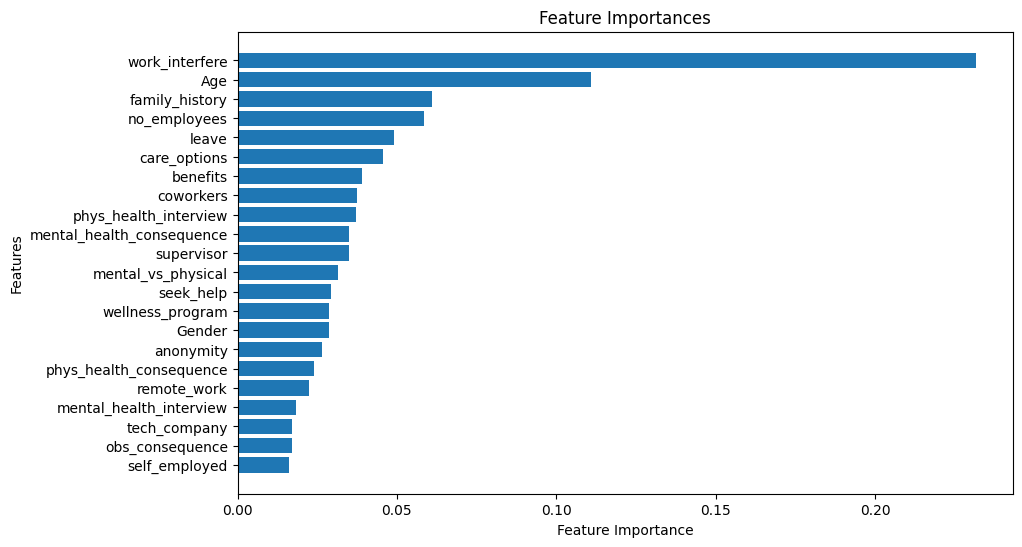

In [62]:
#Finding Feature Importance

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your model is named 'model' and it's already trained
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better display
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

print(feature_df)

# Optional: Bar plot
plt.figure(figsize=(10,6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()
